# Assignment 7 - Eisha Shakeel
## Cleaning the Midterm notebook
## Advancing on assignment 4

### Are LA drivers truly bad drivers?
#### Our research aims to showcase a profile of car crashes in LA by varying social factors and demographics like age, gender, race, types of crashes, as well as times and days with higher collision rates.

### However, I argue that other social and infrastructural factors provide better explanations such as drinking culture, potholes, weather, 

In [1]:
# libraries
import pandas as pd
import numpy as np
import geopandas as gpd

# to give more power to my figures (plots)
import matplotlib.pyplot as plt

import contextily as ctx

# to download osm data
import osmnx as ox

# for interactive plots
import plotly.express as px


In [2]:
df1collisions1419 = pd.read_csv("Collisions_2014-2019_(SWITRS).csv")

In [3]:
df1collisions1419

,X,Y,OBJECTID,case_id,accident_year,proc_date,juris,collision_date,collision_time,officer_id,...,month_,city,county,state,point_x,point_y,match_addr,m_primaryrd,m_secondrd,int_id
0,-118.246279,33.938110,1,9176219,2019,2020/12/09 00:00:00+00,1942,2019/10/24 00:00:00+00,1630,43551.0,...,10,LOS ANGELES,LOS ANGELES,CA,-118.246279,33.938110,"COMPTON AVE & 108TH ST, LOS ANGELES, CA",COMPTON AVE,108TH ST,110153
1,-118.525004,34.259102,42,8785812,2019,2019/02/02 00:00:00+00,1942,2019/01/16 00:00:00+00,2500,41514.0,...,1,LOS ANGELES,LOS ANGELES,CA,-118.525004,34.259102,"HIAWATHA ST & ZELZAH AVE, LOS ANGELES, CA",HIAWATHA ST,ZELZAH AVE,108659
2,0.000000,0.000000,43,8792741,2019,2019/02/21 00:00:00+00,1942,2019/01/17 00:00:00+00,2500,36733.0,...,1,LOS ANGELES,LOS ANGELES,CA,0.000000,0.000000,"RATNER ST & FULTON AVE, LOS ANGELES, CA",RATNER ST,FULTON AVE,136270
3,-118.365862,34.072124,44,8837011,2019,2019/04/30 00:00:00+00,1942,2019/01/20 00:00:00+00,2500,43039.0,...,1,LOS ANGELES,LOS ANGELES,CA,-118.365862,34.072124,"CRESCENT HEIGHTS BLVD & 3RD ST, LOS ANGELES, CA",CRESCENT HEIGHTS BLVD,3RD ST,107485
4,-118.327175,34.023483,45,8798825,2019,2019/02/21 00:00:00+00,1942,2019/01/23 00:00:00+00,2500,38503.0,...,1,LOS ANGELES,LOS ANGELES,CA,-118.327175,34.023483,"9TH AVE & 36TH ST, LOS ANGELES, CA",9TH AVE,36TH ST,148943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37554,-118.268042,34.040627,195479,8926369,2019,2019/09/05 00:00:00+00,1942,2019/06/28 00:00:00+00,2105,33452.0,...,6,LOS ANGELES,LOS ANGELES,CA,-118.268042,34.040627,"FIGUEROA ST & PICO BLVD, LOS ANGELES, CA",FIGUEROA ST,PICO BLVD,117566
37555,-118.242992,34.080387,196090,8923047,2019,2019/08/26 00:00:00+00,1942,2019/06/18 00:00:00+00,2200,42202.0,...,6,LOS ANGELES,LOS ANGELES,CA,-118.242992,34.080387,"ACADEMY RD & ACADEMY DR, LOS ANGELES, CA",ACADEMY RD,ACADEMY DR,121746
37556,-118.550012,34.039474,196091,8924070,2019,2019/10/03 00:00:00+00,1942,2019/06/29 00:00:00+00,2145,42815.0,...,6,LOS ANGELES,LOS ANGELES,CA,-118.550012,34.039474,"PACIFIC COAST HWY & MALIBU VILLAGE LN, LOS ANG...",PACIFIC COAST HWY,MALIBU VILLAGE LN,1859
37557,-118.318252,34.010815,196092,8927892,2019,2019/09/13 00:00:00+00,1942,2019/06/26 00:00:00+00,2210,43044.0,...,6,LOS ANGELES,LOS ANGELES,CA,-118.318252,34.010815,"ARLINGTON AVE & MARTIN LUTHER KING JR BLVD, LO...",ARLINGTON AVE,MARTIN LUTHER KING JR BLVD,120267


In [4]:
gdf = gpd.GeoDataFrame(df1collisions1419, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(df1collisions1419.point_x, df1collisions1419.point_y))

In [5]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# Managed to map the collisions data onto a map

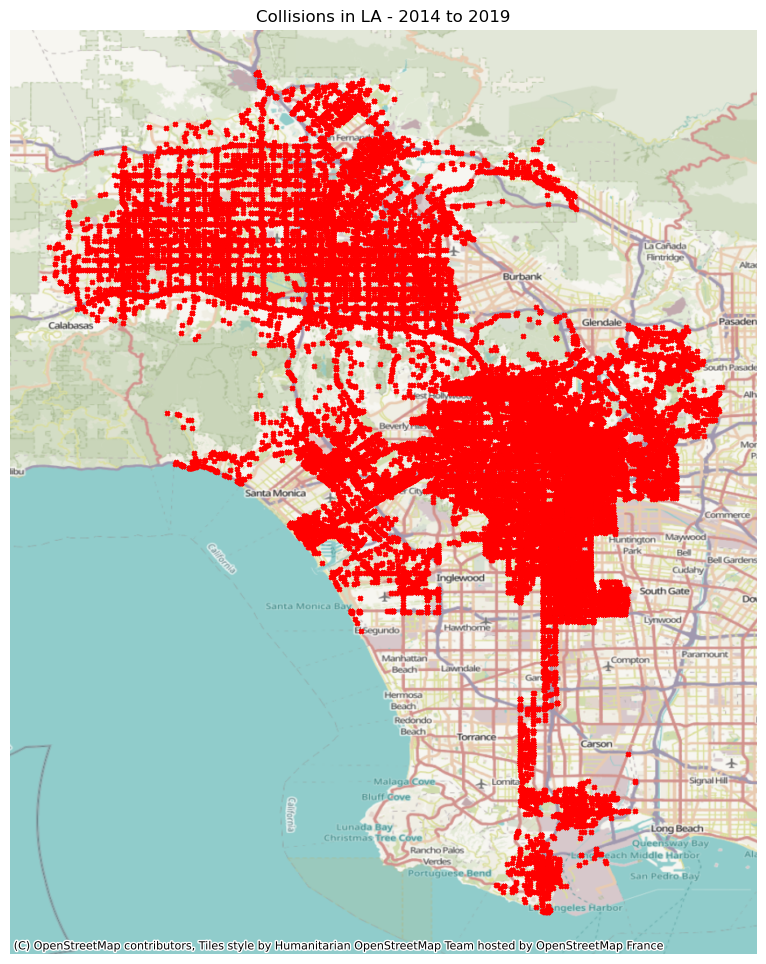

In [6]:
# start the plot
fig, ax = plt.subplots(figsize=(12,12))

usbounds = [-189,18,-66,71]

# add the data options
ax = gdf.clip([-189,18,-66,71]).plot(ax=ax, 
        marker='X',
        markersize=10,
        color='red')

# turn the axes off
ax.axis('off')

# give it a title
ax.set_title('Collisions in LA - 2014 to 2019')

# add a basemap
ctx.add_basemap(ax, crs=4326) # note that we must specify the projection here (crs)

# Here, I entered a new file called Collisions Profile Analysis and Prioritization Scores.
## This dataset is from 2009 to 2013, developed specifically by the Vision Zero team.
This is the link: https://geohub.lacity.org/datasets/ladot::collision-profile-analysis-and-prioritization-scores/explore?layer=0&showTable=true


In [7]:
df2collisionsprofile = gpd.read_file("Collision_Profile_Analysis_and_Prioritization_Scores.geojson")

In [8]:
df2collisionsprofile

,OBJECTID,FID_,Shape__,CaseID,AssetID,PointX,PointY,AccidentYe,CollisionS,PedBikeVeh,...,P9,P10,P11,P12,P13,P14,P15,LAT,LON,geometry
0,1,0,Point,3984274,100055,-118.256090,34.051579,2009,1,P,...,0,0,0,0,0,0,0,34.051566,-118.256081,POINT (-118.25608 34.05157)
1,2,1,Point,3984281,130209,-118.450240,34.227650,2009,1,V,...,0,0,0,0,0,1,0,34.226939,-118.449888,POINT (-118.44989 34.22694)
2,3,2,Point,3984352,114709,-118.304110,34.068981,2009,1,V,...,0,0,0,0,0,0,1,34.068993,-118.304107,POINT (-118.30411 34.06899)
3,4,3,Point,3984369,103365,-118.263633,34.003887,2009,1,P,...,0,0,0,0,0,0,0,34.003891,-118.263955,POINT (-118.26395 34.00389)
4,5,4,Point,4014945,124320,-118.262350,33.778492,2009,1,P,...,0,0,0,0,0,0,0,33.778524,-118.262317,POINT (-118.26232 33.77852)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2927,2928,2927,Point,6511663,146504,-118.310720,34.101719,2013,2,V,...,0,0,0,0,0,0,0,34.101724,-118.310706,POINT (-118.31071 34.10172)
2928,2929,2928,Point,6718004,142564,-118.344030,34.068878,2013,1,P,...,0,1,0,0,0,0,0,34.068892,-118.344022,POINT (-118.34402 34.06889)
2929,2930,2929,Point,6718469,131765,-118.186950,34.127121,2013,1,P,...,0,0,0,0,0,0,0,34.126715,-118.186763,POINT (-118.18676 34.12672)
2930,2931,2930,Point,6718472,114798,-118.287062,34.063652,2013,1,B,...,0,0,1,0,0,0,0,34.063705,-118.287042,POINT (-118.28704 34.06371)


In [9]:
gdf2 = gpd.GeoDataFrame(df2collisionsprofile, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(df2collisionsprofile.PointX, df2collisionsprofile.PointY))

In [10]:
gdf2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

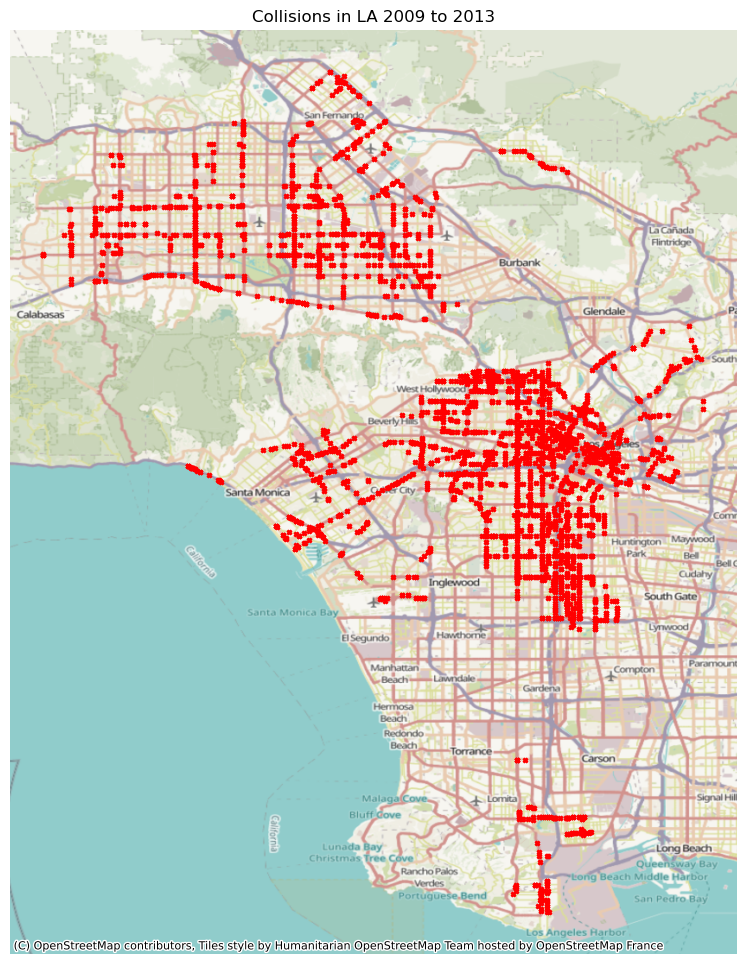

In [11]:
# start the plot
fig, ax = plt.subplots(figsize=(12,12))

usbounds = [-189,18,-66,71]

# add the data options
ax = gdf2.clip([-189,18,-66,71]).plot(ax=ax, 
        marker='X',
        markersize=10,
        color='red')

# turn the axes off
ax.axis('off')

# give it a title
ax.set_title('Collisions in LA 2009 to 2013')

# add a basemap
ctx.add_basemap(ax, crs=4326) # note that we must specify the projection here (crs)

In [12]:
plt.savefig('collisions2013_map.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

# I found a file from the California Highway Patrol called SWITRS 2019 Report
<https://www.chp.ca.gov/programs-services/services-information/switrs-internet-statewide-integrated-traffic-records-system/switrs-2019-report>


## It is an excel file so I will import pandas and numpys

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [14]:
df1fatalbyage = pd.read_csv("Fatal vehicle drivers by age by impairment.csv")

In [15]:
df1fatalbyage

,Degree of Alcohol Impairment,0-14,15-20,21-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65 and over,Not stated,Total
0,HBD - under influence,0.0,37.0,128.0,158.0,94.0,62.0,52.0,43.0,29.0,41.0,17.0,19.0,1.0,681
1,HBD - not under influence,0.0,4.0,10.0,10.0,16.0,9.0,5.0,7.0,2.0,7.0,3.0,13.0,0.0,86
2,HBD - impairment unknown,0.0,6.0,9.0,11.0,11.0,13.0,5.0,5.0,5.0,6.0,4.0,7.0,2.0,84
3,Total,0.0,47.0,147.0,179.0,121.0,84.0,62.0,55.0,36.0,54.0,24.0,39.0,3.0,851
4,Total drivers in fatal crashes,3.0,358.0,497.0,695.0,502.0,426.0,410.0,420.0,369.0,384.0,308.0,586.0,228.0,"5,186"
5,Percent had been drinking,0.0,13.1,29.6,25.8,24.1,19.7,15.1,13.1,9.8,14.1,7.8,6.7,1.3,16.4


County level joining
Google California counties shapefile
use join code by name, have 2 dataframes, county shapefile and accidents data
Add accident data in shapefile
It will include the geometries fo teh counties andv then add another column for january or the total and have county names and geomtries and how many accidents 2019
Look back at lab for census data, walk me through how to join the data and have the different colors

Search for other data for 2019 collisions, search state level 

# It didnt work. Transposed and dropped values in excel sheet and reentered the file below.

In [18]:
df1fatalbyageUPDATED = pd.read_csv("Fatal vehicle drivers by age by impairment UPDATED.csv")

In [19]:
data = {
    'Age': ['0-14', '15-20', '21-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65 and over', 'Not stated'],
    'HBD - under influence': [0, 37, 128, 158, 94, 62, 52, 43, 29, 41, 17, 19, 1],
    'HBD - not under influence': [0, 4, 10, 10, 16, 9, 5, 7, 2, 7, 3, 13, 0],
    'HBD - impairment unknown': [0, 6, 9, 11, 11, 13, 5, 5, 5, 6, 4, 7, 2]
}

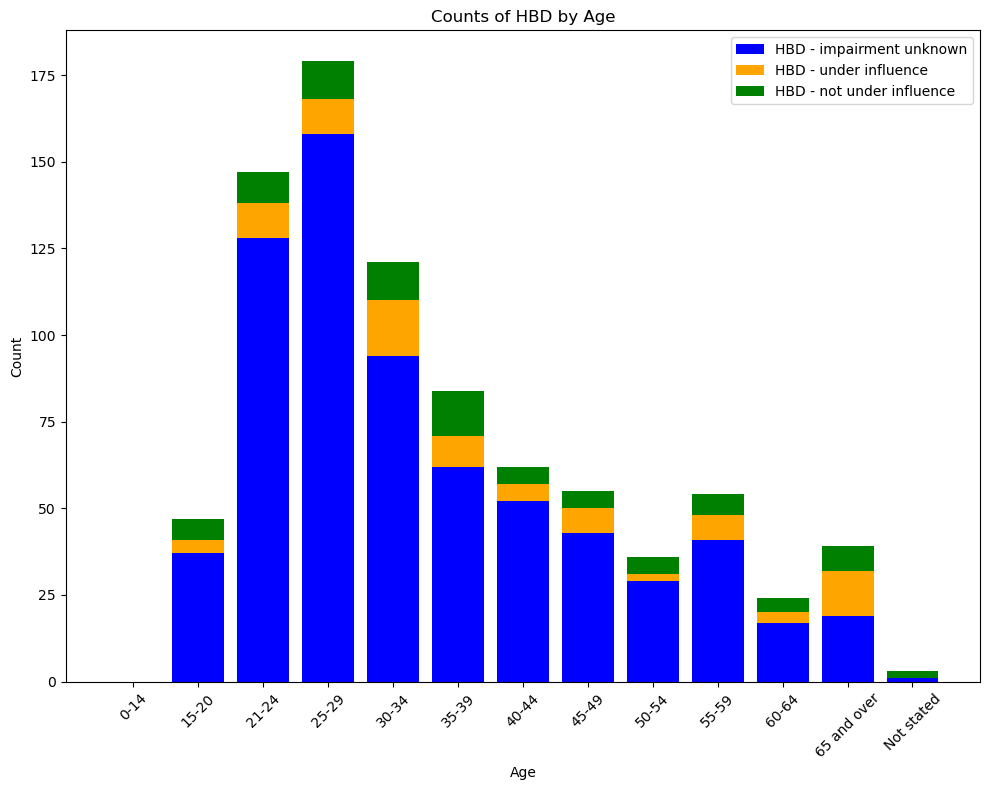

<Figure size 640x480 with 0 Axes>

In [20]:
plt.figure(figsize=(10, 8))

# Plot bars
plt.bar(df1fatalbyageUPDATED['Age'], df1fatalbyageUPDATED['HBD - under influence'], label='HBD - under influence', color='blue')
plt.bar(df1fatalbyageUPDATED['Age'], df1fatalbyageUPDATED['HBD - not under influence'], bottom=df1fatalbyageUPDATED['HBD - under influence'], label='HBD - not under influence', color='orange')
plt.bar(df1fatalbyageUPDATED['Age'], df1fatalbyageUPDATED['HBD - impairment unknown'], bottom=df1fatalbyageUPDATED['HBD - under influence']+df1fatalbyageUPDATED['HBD - not under influence'], label='HBD - impairment unknown', color='green')

# Customize legend
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = list(set(labels))
plt.legend(handles[:3], unique_labels, loc='upper right')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Counts of HBD by Age')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

plt.savefig('histogram.png')

In [21]:
df1alcINJURIES = pd.read_csv("ALCOHOL INVOLVED INJURY CRASHES BY DAY OF WEEK - 2019 - Copy.csv")

In [22]:
df1alcINJURIES

,Hour of Day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Unnamed: 8
0,Midnight - 12:59 A.M.,158,109,105,119,129,257,339,NaN
1,1:00 - 1:59 A.M.,145,87,96,97,134,329,387,NaN
2,2:00 - 2:59 A.M.,149,83,98,118,146,363,393,NaN
3,3:00 - 3:59 A.M.,74,53,50,65,82,193,257,NaN
4,4:00 - 4:59 A.M.,40,23,26,31,55,137,139,NaN
5,5:00 - 5:59 A.M.,22,20,24,22,49,86,89,NaN
6,6:00 - 6:59 A.M.,19,24,21,21,34,72,69,NaN
7,7:00 - 7:59 A.M.,33,39,29,29,40,38,41,NaN
8,8:00 - 8:59 A.M.,33,54,34,45,28,33,35,NaN
9,9:00 - 9:59 A.M.,26,20,17,22,32,36,31,NaN


# Somehow my excel file got an added unnamed column. I removed it with the code below and then checked

In [23]:
df1alcINJURIES.drop(columns=['Unnamed: 8'], inplace=True)

In [24]:
df1alcINJURIES

,Hour of Day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,Midnight - 12:59 A.M.,158,109,105,119,129,257,339
1,1:00 - 1:59 A.M.,145,87,96,97,134,329,387
2,2:00 - 2:59 A.M.,149,83,98,118,146,363,393
3,3:00 - 3:59 A.M.,74,53,50,65,82,193,257
4,4:00 - 4:59 A.M.,40,23,26,31,55,137,139
5,5:00 - 5:59 A.M.,22,20,24,22,49,86,89
6,6:00 - 6:59 A.M.,19,24,21,21,34,72,69
7,7:00 - 7:59 A.M.,33,39,29,29,40,38,41
8,8:00 - 8:59 A.M.,33,54,34,45,28,33,35
9,9:00 - 9:59 A.M.,26,20,17,22,32,36,31


## I want to drop the Unknown hour

In [34]:
df1alcINJURIES.drop(24, inplace=True)

In [35]:
df1alcINJURIES.index

RangeIndex(start=0, stop=24, step=1)

In [36]:
df1alcINJURIES

,Hour of Day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,Midnight - 12:59 A.M.,158,109,105,119,129,257,339
1,1:00 - 1:59 A.M.,145,87,96,97,134,329,387
2,2:00 - 2:59 A.M.,149,83,98,118,146,363,393
3,3:00 - 3:59 A.M.,74,53,50,65,82,193,257
4,4:00 - 4:59 A.M.,40,23,26,31,55,137,139
5,5:00 - 5:59 A.M.,22,20,24,22,49,86,89
6,6:00 - 6:59 A.M.,19,24,21,21,34,72,69
7,7:00 - 7:59 A.M.,33,39,29,29,40,38,41
8,8:00 - 8:59 A.M.,33,54,34,45,28,33,35
9,9:00 - 9:59 A.M.,26,20,17,22,32,36,31


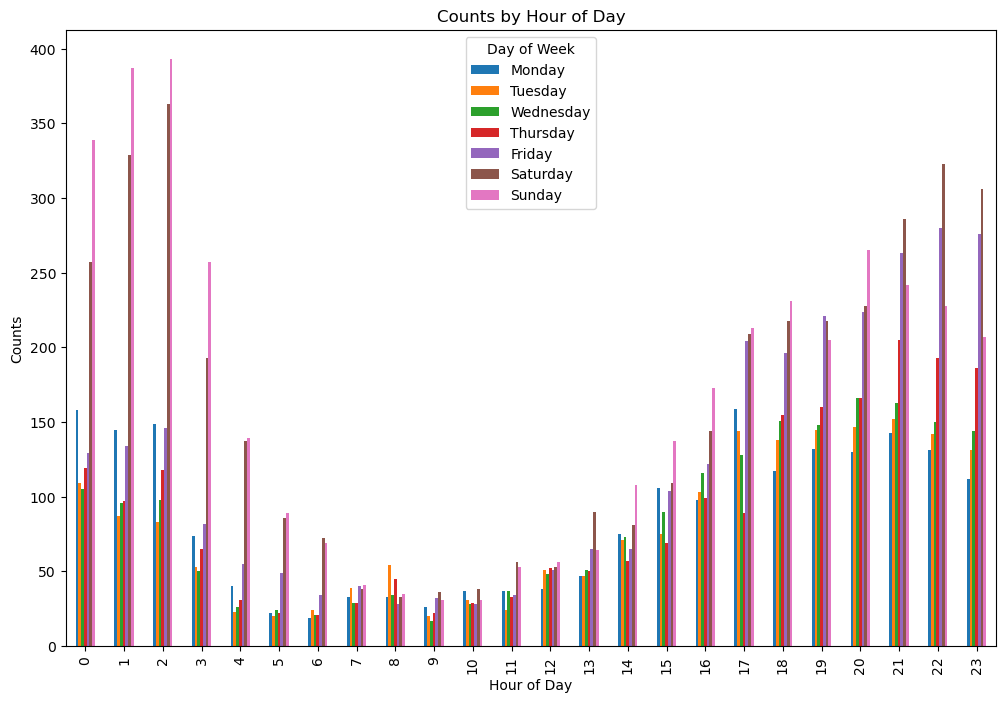

In [37]:
df1alcINJURIES.plot(kind='bar', figsize=(12, 8))
plt.xlabel('Hour of Day')
plt.ylabel('Counts')
plt.title('Counts by Hour of Day')
plt.xticks(rotation=90)
plt.legend(title='Day of Week')
plt.show()

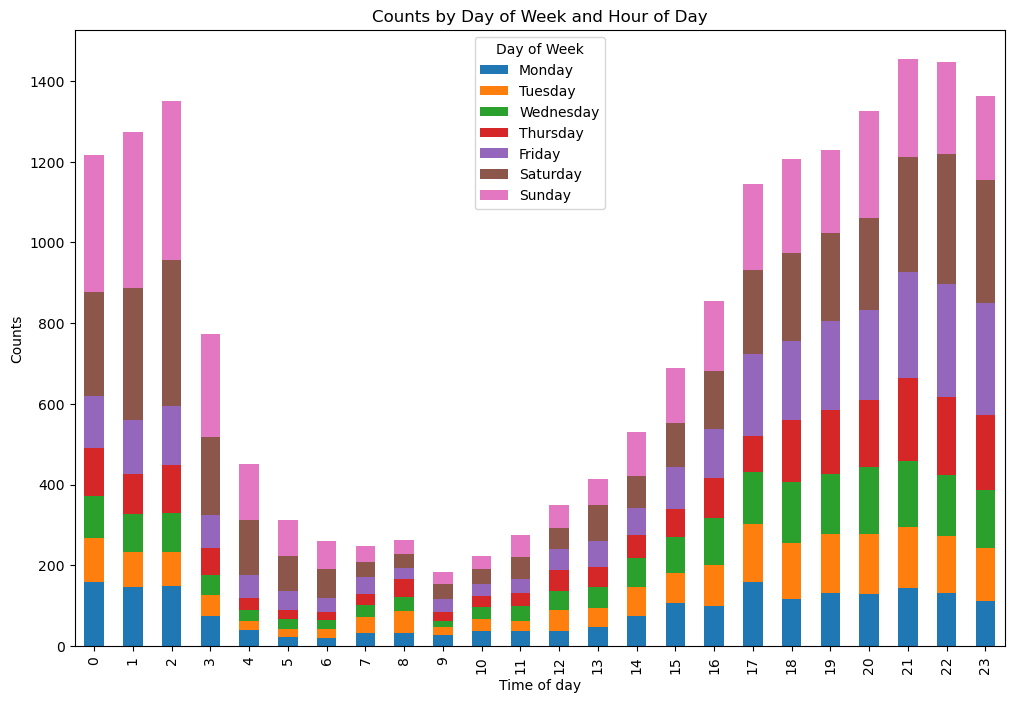

In [38]:
df1alcINJURIES.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Time of day')
plt.ylabel('Counts')
plt.title('Counts by Day of Week and Hour of Day')
plt.xticks(rotation=90)
plt.legend(title='Day of Week')
plt.show()

In [39]:
dfAgeVictim = pd.read_csv("Alc crashes by Age and Victim 2019.csv")

In [40]:
dfAgeVictim

,Age,Driver Killed,Driver Injured,Passenger Killed,Passenger Injured,Pedestrian Killed,Pedestrian Injured,Bicyclist Killed,Bicyclist Injured,Motorcyclist killed,Motorcyclist Injured,Total Killed,Total Injured
0,0-4,0,14,2,243,2,15,0,0,0,2,4,272
1,5,0,2,1,79,0,4,0,0,0,0,1,85
2,6,0,2,1,84,0,1,0,2,0,1,1,89
3,7,0,0,1,89,0,1,0,1,0,2,1,91
4,8,0,0,1,72,0,2,0,3,0,1,1,77
5,9,0,1,3,84,0,2,0,0,0,2,3,87
6,10,0,3,1,103,1,4,0,1,1,1,2,111
7,11,0,0,1,113,0,5,0,1,0,1,1,119
8,12,0,1,1,87,0,4,0,6,0,0,1,98
9,13,0,2,3,96,1,11,0,2,0,0,4,111


In [41]:
dfAgeVictim.drop(columns=['Total Injured'], inplace=True)

In [42]:
dfAgeVictim.drop(columns=['Total Killed'], inplace=True)

In [43]:
dfAgeVictim.index

RangeIndex(start=0, stop=59, step=1)

In [44]:
dfAgeVictim.drop(58, inplace=True)

In [45]:
dfAgeVictim

,Age,Driver Killed,Driver Injured,Passenger Killed,Passenger Injured,Pedestrian Killed,Pedestrian Injured,Bicyclist Killed,Bicyclist Injured,Motorcyclist killed,Motorcyclist Injured
0,0-4,0,14,2,243,2,15,0,0,0,2
1,5,0,2,1,79,0,4,0,0,0,0
2,6,0,2,1,84,0,1,0,2,0,1
3,7,0,0,1,89,0,1,0,1,0,2
4,8,0,0,1,72,0,2,0,3,0,1
5,9,0,1,3,84,0,2,0,0,0,2
6,10,0,3,1,103,1,4,0,1,1,1
7,11,0,0,1,113,0,5,0,1,0,1
8,12,0,1,1,87,0,4,0,6,0,0
9,13,0,2,3,96,1,11,0,2,0,0


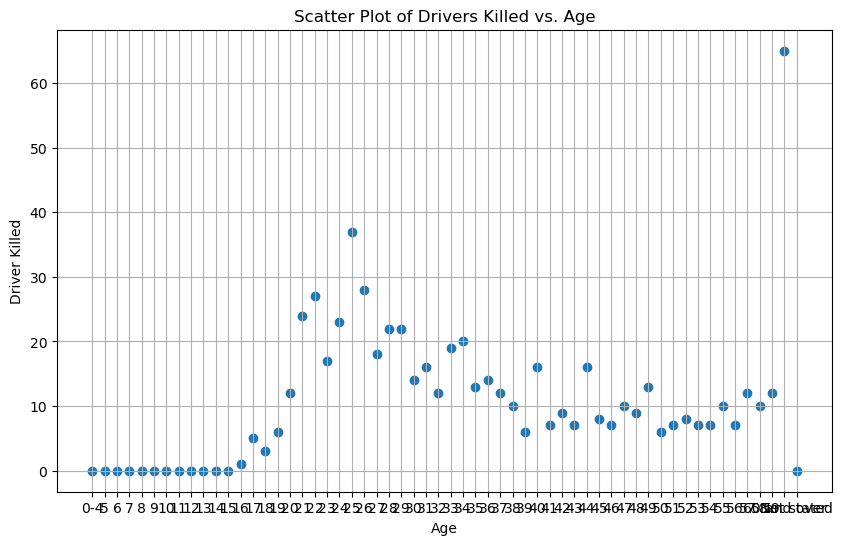

In [52]:
x = dfAgeVictim['Age']
y = dfAgeVictim['Driver Killed']

plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.xlabel('Age')
plt.ylabel('Driver Killed')
plt.title('Scatter Plot of Drivers Killed vs. Age')
plt.grid(True)
plt.show()

In [51]:
print(dfAgeVictim.columns)

# If there are leading or trailing whitespaces, strip them
dfAgeVictim.columns = dfAgeVictim.columns.str.strip()

# Check again to see if it matches 'Age'
print(dfAgeVictim.columns)

Index(['Age', 'Driver Killed', 'Driver Injured', 'Passenger Killed',
       'Passenger Injured', 'Pedestrian Killed', 'Pedestrian Injured',
       'Bicyclist Killed', 'Bicyclist Injured', 'Motorcyclist killed',
       'Motorcyclist Injured'],
      dtype='object')
Index(['Age', 'Driver Killed', 'Driver Injured', 'Passenger Killed',
       'Passenger Injured', 'Pedestrian Killed', 'Pedestrian Injured',
       'Bicyclist Killed', 'Bicyclist Injured', 'Motorcyclist killed',
       'Motorcyclist Injured'],
      dtype='object')


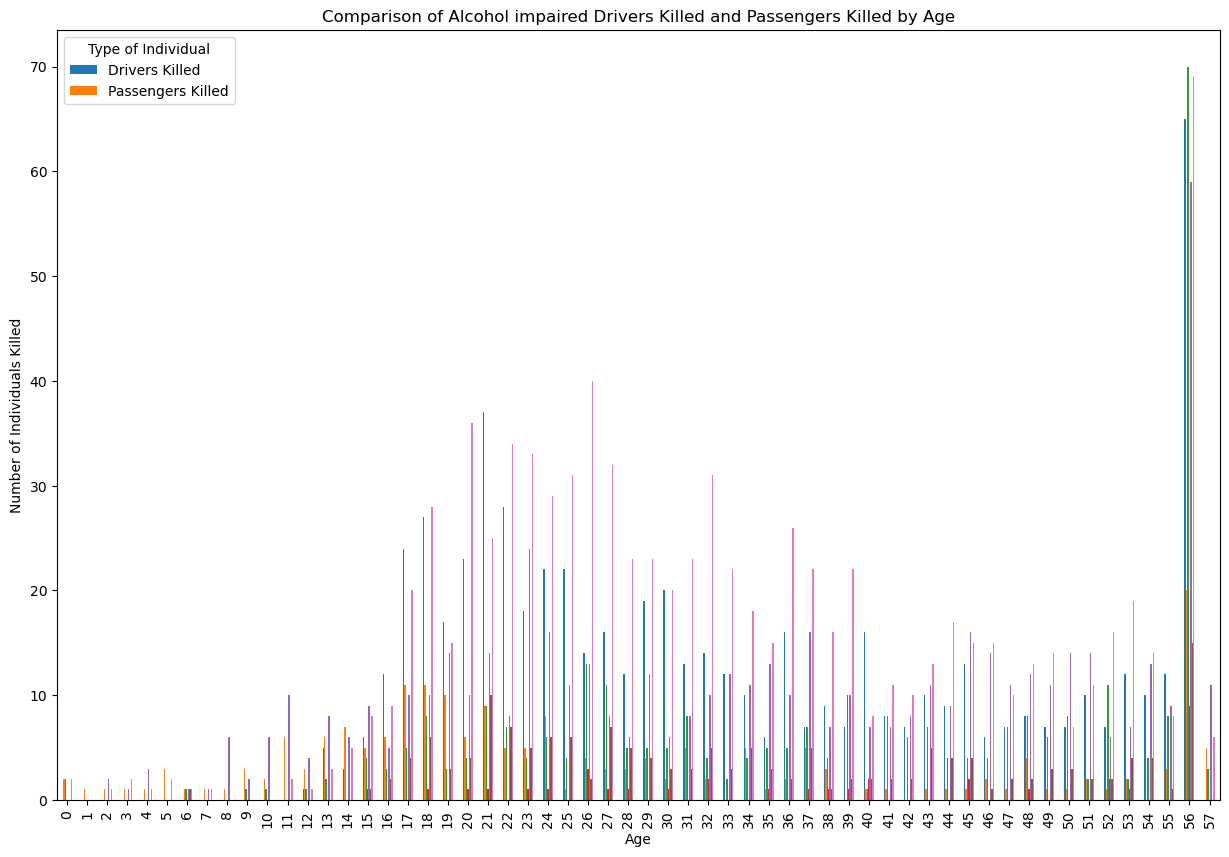

In [53]:
# Plot the bar chart
dfAgeVictim.plot(kind='bar', figsize=(15, 10))
plt.xlabel('Age')
plt.ylabel('Number of Individuals Killed')
plt.title('Comparison of Alcohol impaired Drivers Killed and Passengers Killed by Age')
plt.xticks(rotation=90)
plt.legend(title='Type of Individual', labels=['Drivers Killed', 'Passengers Killed'])
plt.show()

In [54]:
dfAgeVictim

,Age,Driver Killed,Driver Injured,Passenger Killed,Passenger Injured,Pedestrian Killed,Pedestrian Injured,Bicyclist Killed,Bicyclist Injured,Motorcyclist killed,Motorcyclist Injured
0,0-4,0,14,2,243,2,15,0,0,0,2
1,5,0,2,1,79,0,4,0,0,0,0
2,6,0,2,1,84,0,1,0,2,0,1
3,7,0,0,1,89,0,1,0,1,0,2
4,8,0,0,1,72,0,2,0,3,0,1
5,9,0,1,3,84,0,2,0,0,0,2
6,10,0,3,1,103,1,4,0,1,1,1
7,11,0,0,1,113,0,5,0,1,0,1
8,12,0,1,1,87,0,4,0,6,0,0
9,13,0,2,3,96,1,11,0,2,0,0


In [55]:
dftypeHBD = pd.read_csv("SWITRS 2019 Report.csv")

In [56]:
dftypeHBD

,HBD type,2015 Killed,2015 Injured,2016 Killed,2016 Injured,2017 Killed,2017 Injured,2018 Killed,2018 Injured,2019 Killed,2019 Injured
0,HBD Driver,546,"11,054",545,"11,976",587,"11,874",533,"12,126",547,"12,079"
1,HBD Pedestrian,209,"1,040",248,"1,128",249,"1,059",265,"1,065",253,"1,087"
2,HBD Bicyclist,39,532,29,500,29,446,25,451,25,384
3,Passenger in HBD Driver's Vehicle,186,"3,423",173,"3,613",174,"3,468",136,"3,381",142,"3,318"
4,HNBD Driver,79,"4,948",103,"5,666",113,"5,582",93,"5,810",87,"5,803"
5,HNBD Pedestrian,42,494,63,515,62,535,78,526,63,525
6,HNBD Bicyclist,9,203,11,171,14,169,9,175,10,173
7,Passenger in HNBD Driver's Vehicle,34,"3,458",51,"3,825",66,"3,834",82,"3,891",60,"3,964"
8,Total,"1,144","25,152","1,223","27,394","1,294","26,967","1,221","27,425","1,187","27,333"
9,Percent HBD parties\nwere killed/injured,69.4,50.2,67.2,49.7,66.8,49.6,67.4,49.7,69.5,49.6


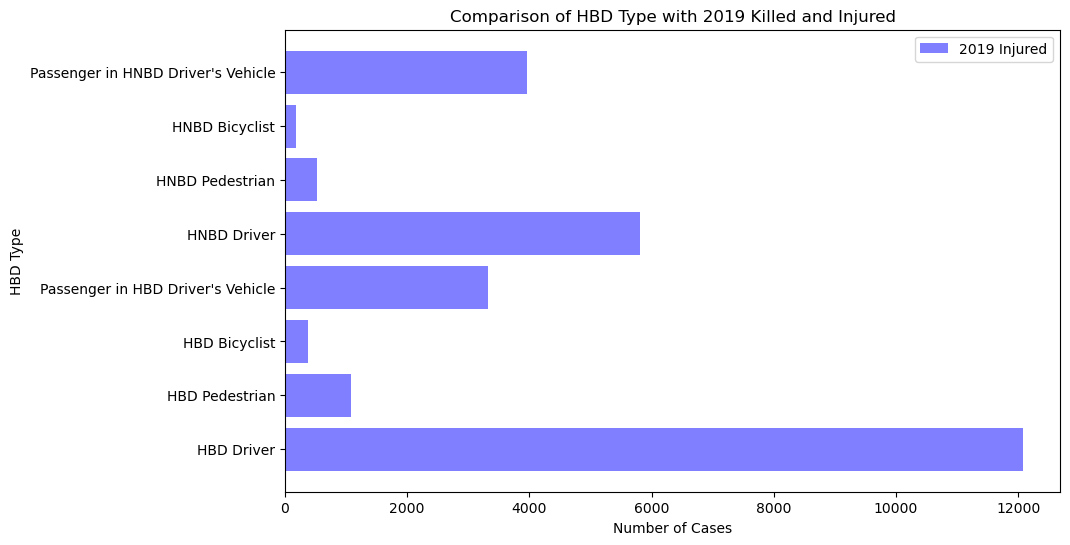

In [57]:
import matplotlib.pyplot as plt

# Extract the relevant data for HBD type, 2019 killed, and 2019 injured
hbd_type = ['HBD Driver', 'HBD Pedestrian', 'HBD Bicyclist', 
            'Passenger in HBD Driver\'s Vehicle', 'HNBD Driver', 
            'HNBD Pedestrian', 'HNBD Bicyclist', 
            'Passenger in HNBD Driver\'s Vehicle']
injured_2019 = [12079, 1087, 384, 3318, 5803, 525, 173, 3964]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.barh(hbd_type, injured_2019, color='blue', label='2019 Injured', alpha=0.5)

# Add labels and title
plt.xlabel('Number of Cases')
plt.ylabel('HBD Type')
plt.title('Comparison of HBD Type with 2019 Killed and Injured')
plt.legend()

# Show the plot
plt.show()

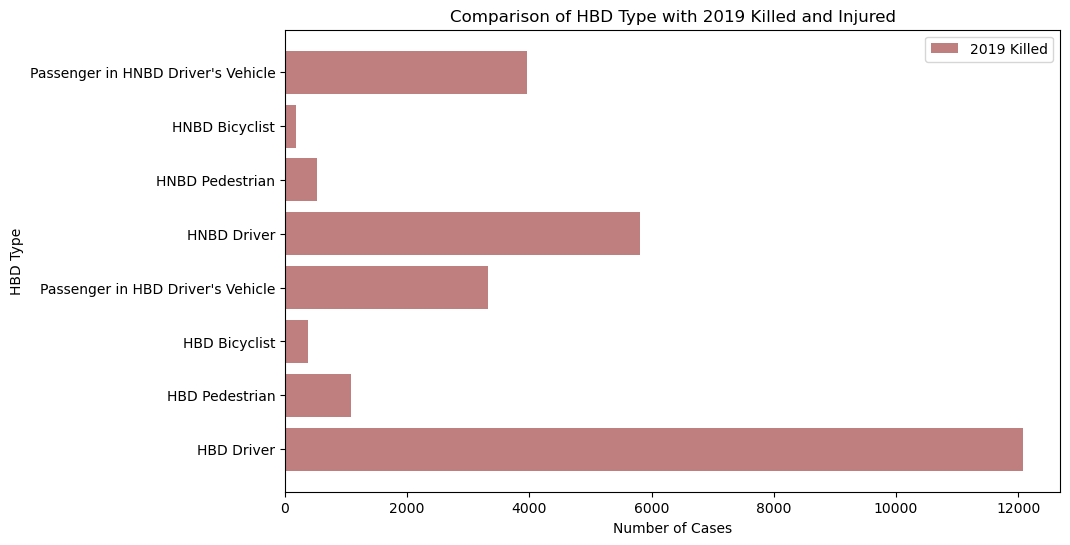

In [63]:
import matplotlib.pyplot as plt

# Extract the relevant data for HBD type, 2019 killed, and 2019 injured
hbd_type = ['HBD Driver', 'HBD Pedestrian', 'HBD Bicyclist', 
            'Passenger in HBD Driver\'s Vehicle', 'HNBD Driver', 
            'HNBD Pedestrian', 'HNBD Bicyclist', 
            'Passenger in HNBD Driver\'s Vehicle']
injured_2019 = [12079, 1087, 384, 3318, 5803, 525, 173, 3964]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.barh(hbd_type, killed_2019, color='maroon', label='2019 Killed', alpha=0.5)

# Add labels and title
plt.xlabel('Number of Cases')
plt.ylabel('HBD Type')
plt.title('Comparison of HBD Type with 2019 Killed and Injured')
plt.legend()

# Show the plot
plt.show()

In [ ]:
dfFatalALCCounty = pd.read_csv("County Fatal Alc crashes.csv")

In [ ]:
dfFatalALCCounty

In [ ]:
# Example data (replace this with your actual data)
data = np.random.rand(10, 12)  # 10 counties, 12 months

# Plotting
plt.figure(figsize=(10, 6))
plt.imshow(data, cmap='viridis', aspect='auto')  # 'viridis' colormap is from light to dark
plt.colorbar(label='Number of occurrences')
plt.title('Heatmap of Monthly Data by County')
plt.xlabel('Month')
plt.ylabel('County')
plt.show()

In [ ]:
import folium
import pandas as pd

In [ ]:
from geopy.geocoders import Nominatim
import pandas as pd

# Initialize Nominatim geocoder
geolocator = Nominatim(user_agent="my_geocoder")

# Example list of counties (replace this with your actual data)
counties = ['Alameda', 'Amador', 'Butte', 'Calaveras', 'Colusa', 
'Contra Costa',
'Del Norte',
'El Dorado',
'Fresno',
'Glenn',
'Humbold',
'Imperial',
'Kern',
'Kings',
'Lake',
'Los Angeles',
'Madera',
'Marin',
'Mariposa',
'Mendocino',
'Merced',
'Mono',
'Monterey',
'Napa',
'Nevada',
'Orange',
'Placer',
'Plumas',
'Riverside',
'Sacramento',
'San Benito',
'San Bernardino',
'San Diego',
'San Francisco',
'San Joaquin',
'San Luis Obispo',
'San Mateo',
'Santa Barbara',
'Santa Clara',
'Santa Cruz',
'Shasta',
'Siskiyou',
'Solano',
'Sonoma',
'Stanislaus',
'Sutter',
'Tehama',
'Trinity',
'Tulare',
'Tuolumne',
'Ventura',
'Yolo',
'Yuba',
'Inyo']

In [ ]:
latitudes = []
longitudes = []

In [ ]:
for county in counties:
    location = geolocator.geocode(county + ", California")
    if location:
        latitudes.append(location.latitude)
        longitudes.append(location.longitude)
    else:
        latitudes.append(None)
        longitudes.append(None)

# Create a DataFrame with the county names and their coordinates
county_data = pd.DataFrame({'County': counties, 'Latitude': latitudes, 'Longitude': longitudes})

# Display the DataFrame
print(county_data)

In [ ]:
merged_data = pd.merge(dfFatalALCCounty, county_data, on='County', how='left')

# Display the merged dataset
print(merged_data)

In [ ]:
gfd3 = gpd.GeoDataFrame(merged_data, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(merged_data.Latitude, merged_data.Longitude))

In [ ]:
gfd3

In [ ]:
gfd3.crs

In [ ]:
import folium
import pandas as pd

california_map = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

# Loop through each row in the merged dataset
for index, row in merged_data.iterrows():
    county = row['County']
    latitude = row['Latitude']
    longitude = row['Longitude']
    value = row['January']  
    # If the latitude or longitude is NaN, skip this row
    if pd.isnull(latitude) or pd.isnull(longitude):
        continue
    
    # Color code the counties based on the column values
    if value < 3:
        color = 'green'
    elif 3 <= value < 6:
        color = 'orange'
    else:
        color = 'red'
    
    # Add a marker for each county with a popup showing the county name and value
    folium.CircleMarker(
        location=[latitude, longitude],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"{county}: {value}"
    ).add_to(california_map)

# Save the map
california_map.save('county_map.html')

## This is just for january. I want to see the total across all months
### So I imported same csv file with the total included and mapped that out using the same code

In [ ]:
dfFatalALCCountyTotal = pd.read_csv("County Fatal Alc crashes with total.csv")

In [ ]:
dfFatalALCCountyTotal

In [ ]:
merged_data2 = pd.merge(dfFatalALCCountyTotal, county_data, on='County', how='left')

In [ ]:
merged_data2

In [ ]:
gfd4 = gpd.GeoDataFrame(merged_data2, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(merged_data2.Latitude, merged_data2.Longitude))
gfd4.crs

In [ ]:
# Loop through each row in the merged dataset
for index, row in merged_data2.iterrows():
    county = row['County']
    latitude = row['Latitude']
    longitude = row['Longitude']
    value = row['Total']  # Replace 'Total' with the correct column name containing the values you want to visualize
    
    # If the latitude or longitude is NaN, skip this row
    if pd.i  snull(latitude) or pd.isnull(longitude):
        continue

In [ ]:
import folium
import pandas as pd

california_map = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

# Loop through each row in the merged dataset
for index, row in merged_data2.iterrows():
    county = row['County']
    latitude = row['Latitude']
    longitude = row['Longitude']
    value = row['Total']  
    # If the latitude or longitude is NaN, skip this row
    if pd.isnull(latitude) or pd.isnull(longitude):
        continue
    
    # Color code the counties based on the column values
if value < 5:
    color = 'yellow'
elif 5 <= value < 10:
    color = 'orange'
elif 10 <= value < 15:
    color = 'pink'
elif 15 <= value < 20:
    color = 'lightred'
elif 20 <= value < 30:
    color = 'red'
elif 30 <= value < 50:
    color = 'maroon'
elif 50 <= value < 100:
    color = 'brown'
else:
    color = 'black'
    
    # Add a marker for each county with a popup showing the county name and value
    folium.CircleMarker(
        location=[latitude, longitude],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"{county}: {value}"
    ).add_to(california_map)

# Save the map
california_map.save('county_map_Total.html')

In [ ]:
import folium
import pandas as pd

california_map = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

# Loop through each row in the merged dataset
for index, row in merged_data2.iterrows():
    county = row['County']
    latitude = row['Latitude']
    longitude = row['Longitude']
    value = row['Total']  
    # If the latitude or longitude is NaN, skip this row
    if pd.isnull(latitude) or pd.isnull(longitude):
        continue
    
    # Color code the counties based on the column values
    if value < 5:
        color = 'yellow'
    elif 5 <= value < 10:
        color = 'orange'
    elif 10 <= value < 15:
        color = 'pink'
    elif 15 <= value < 20:
        color = 'red'
    elif 20 <= value < 30:
        color = 'darkred'
    elif 30 <= value < 50:
        color = 'purple'
    elif 50 <= value < 100:
        color = 'brown'
    else:
        color = 'black'
    
    # Add a marker for each county with a popup showing the county name and value
    folium.CircleMarker(
        location=[latitude, longitude],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"{county}: {value}"
    ).add_to(california_map)

# Save the map
california_map.save('county_map_Total.html')

In [ ]:
dfTypeAccidentAge2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
dfTypeAccidentAge2 = pd.read_csv("Book1kjwbcj.csv")


In [ ]:
# Check lengths of lists
print("Length of 'Age':", len(data['Age']))
print("Length of 'Driver killed':", len(data['Driver killed']))
# Continue checking lengths for other columns

In [ ]:
# Plotting
plt.figure(figsize=(12, 8))
dfTypeAccidentAge2.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('Count')
plt.ylabel('Age')
plt.title('Traffic Casualties by Age Group')
plt.legend(title='Casualty Type')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
dfTypeAccidentAge.plot(kind='bar', stacked=True, colormap='viridis', width=0.8)  # Adjust the width parameter
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Traffic Casualties by Age Group')
plt.legend(title='Casualty Type')
plt.show()

In [ ]:
print(dfTypeAccidentAge.columns)

In [ ]:
dfAgeVictim.set_index('Age', inplace=True)

# Plot the bar chart
dfAgeVictim.plot(kind='bar', figsize=(15, 10))
plt.xlabel('Age')
plt.ylabel('Number of Individuals Killed')
plt.title('Comparison of Alcohol impaired Drivers Killed and Passengers Killed by Age')
plt.xticks(rotation=90)
plt.legend(title='Type of Individual', labels=['Drivers Killed', 'Passengers Killed'])
plt.show()